In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist     #손글씨 데이터

### 데이터 로딩

In [2]:
data = mnist.load_data()

In [3]:
((X_train,y_train),(X_test,y_test)) = data

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 데이터 확인

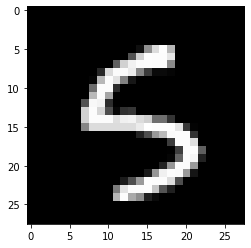

In [6]:
## imshow 이미지출력함수
plt.imshow(X_train[15000],cmap='gray')  ##6만장의 사진이 있으니..

In [7]:
y_train[15000]  ## 15000번째 데이터의 정답

5

In [8]:
X_train[15000].shape

(28, 28)

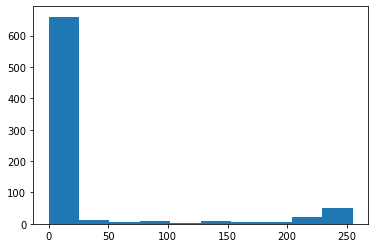

In [9]:
plt.hist(X_train[15000].reshape(-1))
plt.show()

### 데이터 셋 준비

In [22]:
X_train.shape

(60000, 28, 28)

In [26]:
X_train_reshape = X_train.reshape(X_train.shape[0], 28, 28, 1) ##6만장의사진을1차원으로 펴 버리겠다
X_test_reshape = X_test.reshape(X_test.shape[0], 28, 28, 1 )

X_train_reshape.shape, X_test_reshape.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [19]:
#X_train_reshape[0].shape

(784,)

##### 2. 정답데이터 (0~9로 구성)  --> 확률 정보로 변경 시키기

In [11]:
import numpy as np
np.unique(y_train) 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

- 현재.. 문제와 답을 가지고 학습하는 지도학습이며 다중분류(10개중 어떤 것이 나올지 분류하는)문제이다
- 이를 확률문제로 바꿀 것! (e.g., 0일확률100퍼 1~9일 확률 각각0퍼 ... ==> [100,0,0,0,0,0,0,0,0,0])

In [12]:
import pandas as pd
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

In [13]:
y_train_one_hot

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


### 모델생성
- input_dim : 입력하는 데이터의 모양
- 출력층의 퍼셉트론 갯수

In [14]:
## 초기화
import numpy as np
import tensorflow
seed = 0
np.random.seed(seed)
tensorflow.random.set_seed(seed)

# 21th

### CNN : 이미지의 특성을 추출해서 요약

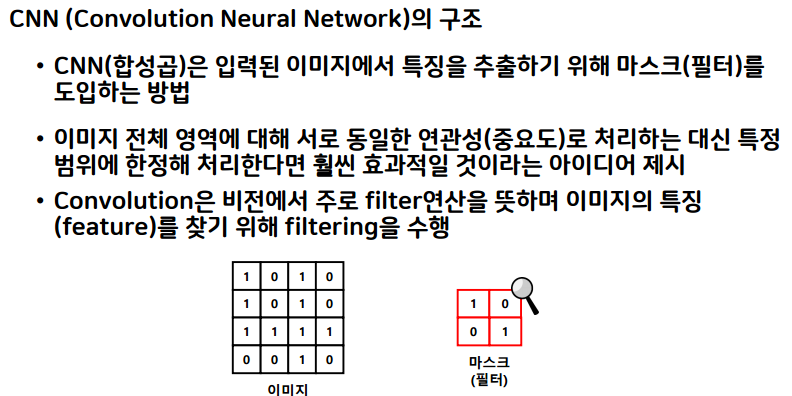

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [27]:
X_train_reshape[0].shape

(28, 28, 1)

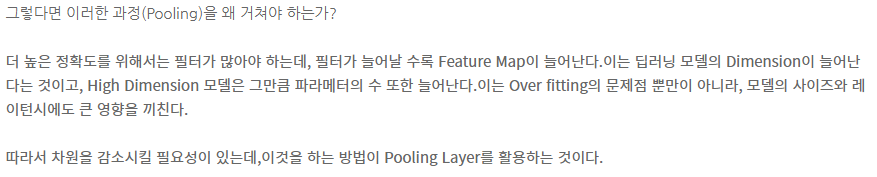

In [39]:
# 1. 모델 구조 생성
model = Sequential()

# CNN 망을 추가 --> 특성 추출해서 요약
# Conv2D() : 컨볼루션을 수행
# MaxPooling2D() : 이미지 크기를 축소(압축)
# Flatten() : 다차원 데이터를 1차원으로 변환 (DNN에 데이터를 넘기기 위해)
# Dropout() : 과대적합을 방지하기위해 사용되는 노드를 제한 (가급적 0.5이하로 할 것 __ 원래 가진 특성을 잃어버릴 수 있기 때문)
####             --> 크기가 급격히 차이나는 곳에서 쓰면 과대적합 안생기겠지 || 은닉층 직전에 사용
# padding : 컨볼루션 후에 이미지 크기가 줄어드는 것을 방지 (하기 위해 외곽을 0으로 채움)
####             --> same  : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일
####             --> valid : 유효한 영역만 출력. 따라서 출력 이미지 사이즈 < 입력 이미지 사이즈. (패딩 사용x)
# stride : 필터를 몇 픽셀씩 이동할 것인지 설정
####             --> 큰 용량에 적용할 경우 알맞는 크기 지정하지 않으면 굉장히 느릴 수 있음

##이미지 특성 뽑고
model.add(Conv2D(filters=10,               # 필터의 수   ###### 여기서는 0~9까지 10개이므로 
                 kernel_size = (3,3) \,     # 필터의 크기
                 input_shape=(28,28,1),        ##다차원데이터는 input_shape:이미지크기 (일차원데이터는 input_dim) 현재 28*28 흑백이미지
                 padding = "same",         # zero 패딩을 하겠다!
                 activation='sigmoid'))              
##이미지 크기 줄임
model.add(MaxPooling2D(pool_size=(2,2)))   # 1/4로 크기를 줄이겠다   ### pool_size : 수직, 수평 축소 비율을 지정 
                                           ## ((3,3)이면 1/9크기로)     그냥 2라면 1/2 크기로
model.add(Conv2D(10, (3,3), padding="same", activation="sigmoid"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())   ## 맥스풀링 레이어는 주로 2차원 자료를 다루지만 
                       ## 전결합층에 전달하기 위해선 1차원 자료로 바꿔줘야 함. 이 때 사용되는 것이 Flatten layer




# model.add(Dense(512, input_dim=784, activation='relu')) 입력층 대신  Conv2D가 일함

model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 10)        910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 10)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 490)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               125696    
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

In [35]:
# 2. 모델 학습방법, 평가방법
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001), ##이렇게 클래스로 객체생성해서 쓸 수 있음 <기본매개변수로 쓰느냐vs뭔가 써보고싶으냐>
             metrics=["accuracy"]) ##분류에서 사용하는 가장 일반적인 방법 accuracy

#### 베스트 모델을 저장

In [36]:
import os
# 베스트 모델을 찾아서 저장
from tensorflow.keras.callbacks import ModelCheckpoint
# 학습이 더 이상 나아지지 않는다면 학습을 중단
from tensorflow.keras.callbacks import EarlyStopping

BEST_MODEL_DIR = ".\\model\\"   ## 모델을 저장하는 폴더

if not os.path.exists(BEST_MODEL_DIR):   ## 만일 위의 폴더가 존재하지 않으면
    os.mkdir(BEST_MODEL_DIR)              ## 이 이름의 폴더를 만들어라!
    
# eg. mnist_001-70.2246.hd5
BEST_MODEL_PATH = BEST_MODEL_DIR + "mnist_{epoch:03d}-{val_accuracy:.4f}.hd5"

# filepath : 베스트 모델을 저장할 경로
# monitor : 베스트 모델을 찾을 기준
# save_best_only : 베스트 모델만 저장
# verbose : 실행 과정을 출력 (0 : 출력 안함)
mc = ModelCheckpoint(filepath=BEST_MODEL_PATH,
                    monitor="val_accuracy",
                    save_best_only=True,
                    verbose=1)

# monitor : 중지할 기준
# patience : 학습이 나아지지 않더라도 진행하는 반복횟수
et = EarlyStopping(monitor="val_accuracy",
                  patience=5)

In [37]:
# 3. 모델 학습하기
history = model.fit(X_train_reshape,
                    y_train_one_hot,   ##np.array(y_train_one_hot)
                    validation_split=0.2,
                    epochs=2000,
                   callbacks=[mc, et])   ##fit 할때마다 callbacks 함수 호출하는 것
##배치사이즈 생략시 기본값 32

Train on 48000 samples, validate on 12000 samples
Epoch 1/2000
47872/48000 [============================>.] - ETA: 0s - loss: 0.7287 - accuracy: 0.7732
Epoch 00001: val_accuracy improved from -inf to 0.94717, saving model to .\model\mnist_001-0.9472.hd5
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: .\model\mnist_001-0.9472.hd5\assets
48000/48000 [==============================] - 9s 191us/sample - loss: 0.7271 - accuracy: 0.7738 - val_loss: 0.1870 - val_accuracy: 0.9472
Epoch 2/2000
47360/48000 [============================>.] - ETA: 0s - loss: 0.1598 - accuracy: 0.9524
Epoch 00002: val_accuracy improved from 0.94717 to 0.96783, saving model to .\model\mnist_002-0.9678.hd5
INFO:tensorflow:Assets written to: .\model\mnist_002-0.9678.hd5\assets
48000/48000 [==============================] - 5s 106us/sample - loss: 0.1586 - accuracy: 0.9528 - val_loss: 0.1100 - val_accuracy: 0.9678
Epoch 3/2000
47936/48000 [============

Epoch 23/2000
47872/48000 [============================>.] - ETA: 0s - loss: 0.0112 - accuracy: 0.9962
Epoch 00023: val_accuracy did not improve from 0.98600
48000/48000 [==============================] - 4s 83us/sample - loss: 0.0112 - accuracy: 0.9962 - val_loss: 0.0582 - val_accuracy: 0.9858


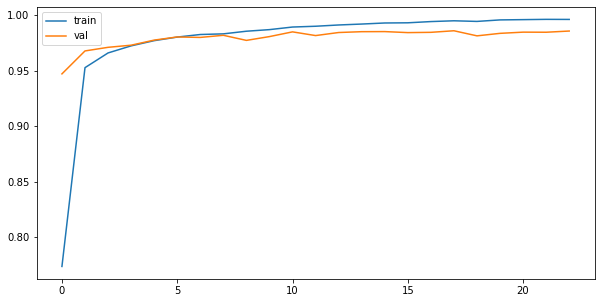

In [38]:
plt.figure(figsize=(10,5))     # 가로, 세로
plt.plot(history.history['accuracy'], label='train') # 훈련용 데이터로 평가한 점수
plt.plot(history.history['val_accuracy'], label='val') #검증용 데이터로 평가한 점수
plt.legend()   #범례
plt.show()

- 과소: val>train (훈련을 했는데 다 맞춤) 
- test가 더 낮게 나와야함

### 모델을 저장

In [20]:
import os

MODEL_DIR =".\\model\\"  ## \하나쓰면 줄넘김

# 해당 폴더가 없다면 폴더를 생성
if not os.path.exists(MODEL_DIR): ##해당되는 폴더가 없다면
    os.mkdir(MODEL_DIR)

In [31]:
# 모델 저장
path = MODEL_DIR + "mnist_model01.hd5"
model.save(path)

INFO:tensorflow:Assets written to: .\model\mnist_model01.hd5\assets


In [32]:
# 기본 모델 삭제
del model

In [33]:
## model.evaluate(X_test_reshape, y_test_one_hot)  ####삭제되고 없지

NameError: name 'model' is not defined

In [35]:
#저장한 모델 불러오기 ========================> 갱신된 w,b값 저장된 파일
from tensorflow.keras.models import load_model

model = load_model(path)

In [36]:
model.evaluate(X_test_reshape, y_test_one_hot)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.1228 - accuracy: 0.9771


[0.12277748135440852, 0.9771]

In [42]:
path2 = BEST_MODEL_DIR + "mnist_016-0.9765.hd5"   ##이 모델이 저장된 모델 중 정확도 높아서 가져온 것

In [43]:
model1 = load_model(path2)

In [44]:
model1.evaluate(X_test_reshape, y_test_one_hot)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.1139 - accuracy: 0.9775


[0.11392544238452537, 0.9775]

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
__________________________________________________

Total params = 딥러닝에서 학습하는 가중치의 갯수